# MARATÓN BEHIND THE CODE 2021

# Desafío 05 - Predicción de pérdida de cliente (Churn) | SONDA

El desafío es un problema común en el campo de la ciencia de datos. Un cliente expone un problema específico en su área y mediante su análisis encuentra una posible solución. Un cliente del área de Telecomunicaciones reportó un problema de pérdida de cliente (Churn) y le gustaría poder identificar esta posible pérdida antes de que ocurra, utilizando inteligencia artificial.
<hr>


## Exploración de los datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargue aqui el dataset
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv
df = pd.read_csv(r'dataset.csv')

--2021-12-11 04:17:34--  https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622307 (608K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 607.72K  --.-KB/s    in 0.04s   

2021-12-11 04:17:34 (13.5 MB/s) - ‘dataset.csv’ saved [622307/622307]



In [3]:
df.head()

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4548 non-null   int64  
 1   GENDER            4520 non-null   object 
 2   SENIORCITIZEN     4523 non-null   float64
 3   PARTNER           4524 non-null   object 
 4   DEPENDENTS        4526 non-null   object 
 5   TENURE            4533 non-null   float64
 6   PHONESERVICE      4520 non-null   object 
 7   MULTIPLELINES     4523 non-null   object 
 8   INTERNETSERVICE   4524 non-null   object 
 9   ONLINESECURITY    4518 non-null   object 
 10  ONLINEBACKUP      4518 non-null   object 
 11  DEVICEPROTECTION  4524 non-null   object 
 12  TECHSUPPORT       4530 non-null   object 
 13  STREAMINGTV       4523 non-null   object 
 14  STREAMINGMOVIES   4523 non-null   object 
 15  CONTRACT          4525 non-null   object 
 16  PAPERLESSBILLING  4517 non-null   object 


In [5]:
df.describe()

,ID,SENIORCITIZEN,TENURE,MONTHLYCHARGES
count,4548.000000,4523.000000,4533.000000,4527.000000
mean,5478.833773,0.163608,31.812927,95.836351
std,2608.431590,0.369961,24.419055,75.492469
min,1004.000000,0.000000,0.000000,0.090000
25%,3224.750000,0.000000,8.000000,34.645000
50%,5455.500000,0.000000,28.000000,73.530000
75%,7732.250000,0.000000,54.000000,143.595000
max,9999.000000,1.000000,72.000000,345.240000


In [6]:
df.nunique()

ID                  4548
GENDER                 2
SENIORCITIZEN          2
PARTNER                2
DEPENDENTS             2
TENURE                73
PHONESERVICE           2
MULTIPLELINES          3
INTERNETSERVICE        3
ONLINESECURITY         3
ONLINEBACKUP           3
DEVICEPROTECTION       3
TECHSUPPORT            3
STREAMINGTV            3
STREAMINGMOVIES        3
CONTRACT               3
PAPERLESSBILLING       2
PAYMENTMETHOD          4
MONTHLYCHARGES      4073
TOTALCHARGES        4495
CHURN                  2
dtype: int64

In [7]:
df.isnull().sum()

ID                   0
GENDER              28
SENIORCITIZEN       25
PARTNER             24
DEPENDENTS          22
TENURE              15
PHONESERVICE        28
MULTIPLELINES       25
INTERNETSERVICE     24
ONLINESECURITY      30
ONLINEBACKUP        30
DEVICEPROTECTION    24
TECHSUPPORT         18
STREAMINGTV         25
STREAMINGMOVIES     25
CONTRACT            23
PAPERLESSBILLING    31
PAYMENTMETHOD       28
MONTHLYCHARGES      21
TOTALCHARGES        21
CHURN                0
dtype: int64

In [8]:
df['CHURN'] = df['CHURN'].map({'No':False, 'Yes':True})
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4106 non-null   int64  
 1   GENDER            4106 non-null   object 
 2   SENIORCITIZEN     4106 non-null   float64
 3   PARTNER           4106 non-null   object 
 4   DEPENDENTS        4106 non-null   object 
 5   TENURE            4106 non-null   float64
 6   PHONESERVICE      4106 non-null   object 
 7   MULTIPLELINES     4106 non-null   object 
 8   INTERNETSERVICE   4106 non-null   object 
 9   ONLINESECURITY    4106 non-null   object 
 10  ONLINEBACKUP      4106 non-null   object 
 11  DEVICEPROTECTION  4106 non-null   object 
 12  TECHSUPPORT       4106 non-null   object 
 13  STREAMINGTV       4106 non-null   object 
 14  STREAMINGMOVIES   4106 non-null   object 
 15  CONTRACT          4106 non-null   object 
 16  PAPERLESSBILLING  4106 non-null   object 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4106 non-null   int64  
 1   GENDER            4106 non-null   object 
 2   SENIORCITIZEN     4106 non-null   float64
 3   PARTNER           4106 non-null   object 
 4   DEPENDENTS        4106 non-null   object 
 5   TENURE            4106 non-null   float64
 6   PHONESERVICE      4106 non-null   object 
 7   MULTIPLELINES     4106 non-null   object 
 8   INTERNETSERVICE   4106 non-null   object 
 9   ONLINESECURITY    4106 non-null   object 
 10  ONLINEBACKUP      4106 non-null   object 
 11  DEVICEPROTECTION  4106 non-null   object 
 12  TECHSUPPORT       4106 non-null   object 
 13  STREAMINGTV       4106 non-null   object 
 14  STREAMINGMOVIES   4106 non-null   object 
 15  CONTRACT          4106 non-null   object 
 16  PAPERLESSBILLING  4106 non-null   object 


In [10]:
import plotly.express as px

target = df["CHURN"].value_counts().to_frame()
target = target.reset_index()
target = target.rename(columns={'index': 'Valor'})
fig = px.pie(target, values='CHURN', names='Valor',
             title='Distribucion de TARGET')
fig.show()


### Relacion entre Features

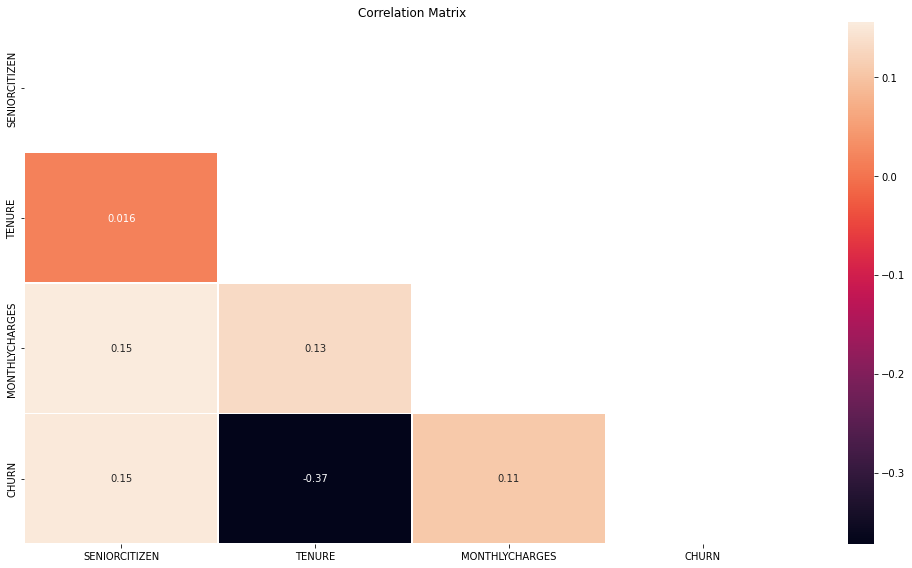

In [11]:
# HeatMap
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize = (14, 8))
mask = np.triu(np.ones_like(df.drop(columns=['ID']).corr(), dtype=bool))

sns.heatmap(round(df.drop(columns=['ID']).corr(method = 'spearman'), 3), mask=mask,annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Distribución de las variables

## Procesamiento de datos y Entrenamiento de Modelo

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Un transformador para fixear datos del Desafio1
class FixerDesafio5(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primero realizamos la cópia del DataFrame 'X' de entrada
        df = X.copy()
        
        df.drop(columns=['ID'], inplace=True)

        df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'],errors='coerce')

        # Categoricas Binarias
        df['GENDER'] = df['GENDER'].map({'Female':False, 'Male':True})
        df['PARTNER'] = df['PARTNER'].map({'No':False, 'Yes':True})
        df['DEPENDENTS'] = df['DEPENDENTS'].map({'No':False, 'Yes':True})
        df['PHONESERVICE'] = df['PHONESERVICE'].map({'No':False, 'Yes':True})
        df['PAPERLESSBILLING'] = df['PAPERLESSBILLING'].map({'No':False, 'Yes':True})

        # Categoricas multiples
        # df['MULTIPLELINES'] = df['MULTIPLELINES'].map({'No':1, 'Yes':2, 'No phone service':0})
        # df['INTERNETSERVICE'] = df['INTERNETSERVICE'].map({'No':0, 'Fiber optic':1, 'DSL':2})
        # df['ONLINESECURITY'] = df['ONLINESECURITY'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['ONLINEBACKUP'] = df['ONLINEBACKUP'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['DEVICEPROTECTION'] = df['DEVICEPROTECTION'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['TECHSUPPORT'] = df['TECHSUPPORT'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['STREAMINGTV'] = df['STREAMINGTV'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['STREAMINGMOVIES'] = df['STREAMINGMOVIES'].map({'No':1, 'Yes':2, 'No internet service':0})
        # df['CONTRACT'] = df['CONTRACT'].map({'Month-to-month':0, 'One year':1, 'Two year':2})

        # df['PAYMENTMETHOD'] = df['PAYMENTMETHOD'].map({'Credit card (automatic)':0,
        #                                               'Bank transfer (automatic)':1,
        #                                               'Electronic check':2,
        #                                               'Mailed check':3})
        #df = pd.get_dummies(df, drop_first=True)



        return df

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

categoricas = [
                'MULTIPLELINES',
                'INTERNETSERVICE',
                'ONLINESECURITY',
                'ONLINEBACKUP',
                'DEVICEPROTECTION',
                'TECHSUPPORT',
                'STREAMINGTV',
                'STREAMINGMOVIES',
                'CONTRACT',
                'PAYMENTMETHOD',
]

# Define categorical pipeline
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False))
])

numericas = [
             'TOTALCHARGES',
             'TENURE',
             'MONTHLYCHARGES'              
]

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
],)

# Combino procesamiento de Categoricas y numericas.
preprocessor = ColumnTransformer(transformers =[
    ('cat', cat_pipe, categoricas),
    ('num', num_pipe, numericas),
],remainder='passthrough')


In [25]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

def evaluate_model(model, X, y, repeats):
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=2, n_repeats=repeats)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
  print(scores)
  print('Mean f1: %.3f (%.3f)' % (mean(scores), std(scores)))


In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

# Defino pipeline de pre-procesamiento
my_pipeline = Pipeline([
                        ('fixer', FixerDesafio5()),
                        ('preprocessor', preprocessor),
                        ('model', LogisticRegression(C=0.4, class_weight={0: 0.3, 1: 0.7},
                                    solver='newton-cg'))
                        ])


# Separo Features y Target
target = ['CHURN']
X = df[list((set(df.columns) - set(target)))]
y = df[target]


In [167]:
# Cross validation scores
evaluate_model(my_pipeline, X, y, 5)


[0.62781663 0.63035019 0.64748201 0.60922147 0.63734568 0.61598138
 0.64848012 0.62137405 0.64159632 0.61645963]
Mean f1: 0.630 (0.013)


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

test_pct = 0.3 # Separaremos 30% de los dados para testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)


my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): {acc}")
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1_0 del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_0}")
print(f"F1_1 del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_1}")


print(classification_report(y_test, y_pred,digits=5, target_names=['0', '1']))

Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.773538961038961
F1_0 del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.8361714621256606
F1_1 del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.6333771353482262
              precision    recall  f1-score   support

           0    0.92348   0.76395   0.83617       932
           1    0.52278   0.80333   0.63338       300

    accuracy                        0.77354      1232
   macro avg    0.72313   0.78364   0.73477      1232
weighted avg    0.82590   0.77354   0.78679      1232



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.774\nPrecision=0.523\nRecall=0.803\nF1 Score=0.6333771353482262')

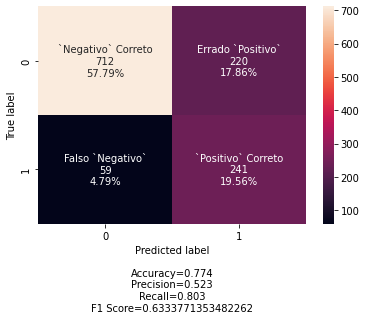

In [169]:
from sklearn.metrics import confusion_matrix
import numpy as np


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Negativo` Correto', 'Errado `Positivo`', 'Falso `Negativo`', '`Positivo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score_m  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score_m)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

### Hyper Tunning



In [157]:
from sklearn.model_selection import GridSearchCV

space = dict()
space['model__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['model__penalty'] = ['none', 'l2']
space['model__C'] = [0.2,0.3,0.4, 0.5,0.6,0.7]

rand_search = GridSearchCV(my_pipeline, space,
                                        #n_iter=32,
                                        scoring='f1',
                                        verbose=True,
                                        cv=5,
                                        n_jobs=-1,
                                        #random_state=5
                                  )

rand_search.fit(X_train, y_train)
print(rand_search.best_params_)
print(rand_search.best_estimator_)
print(rand_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Pipeline(steps=[('fixer', FixerDesafio5()),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MULTIPLELINES',
                                                   'INTERNETSERVICE',
                                                   'ONLINESECURITY',
                                                   'ONLINEBACKUP',
                    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

#### Entrenamiento final con todo el dataset

In [170]:
from sklearn.metrics import f1_score
my_pipeline.fit(X, y)
print("F1 dataset: {}".format(f1_score(y, my_pipeline.predict(X))))


F1 dataset: 0.6419180201082754


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## Predicción de valores

In [171]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv
df_to_be_scored = pd.read_csv(r'ANSWERS.csv')
df_to_be_scored.tail()

--2021-12-11 05:11:07--  https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182321 (178K) [text/plain]
Saving to: ‘ANSWERS.csv’

ANSWERS.csv         100%[===================>] 178.05K  --.-KB/s    in 0.03s   

2021-12-11 05:11:08 (6.71 MB/s) - ‘ANSWERS.csv’ saved [182321/182321]



,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
1319,5478,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.41,75.76,TO_FILL
1320,6297,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.51,6554.96,TO_FILL
1321,7952,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,227.81,6872.81,TO_FILL
1322,8473,Male,0,No,No,11,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,7.33,747.88,TO_FILL
1323,7018,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),157.64,7102.24,TO_FILL


In [172]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1324 non-null   int64  
 1   GENDER            1324 non-null   object 
 2   SENIORCITIZEN     1324 non-null   int64  
 3   PARTNER           1324 non-null   object 
 4   DEPENDENTS        1324 non-null   object 
 5   TENURE            1324 non-null   int64  
 6   PHONESERVICE      1324 non-null   object 
 7   MULTIPLELINES     1324 non-null   object 
 8   INTERNETSERVICE   1324 non-null   object 
 9   ONLINESECURITY    1324 non-null   object 
 10  ONLINEBACKUP      1324 non-null   object 
 11  DEVICEPROTECTION  1324 non-null   object 
 12  TECHSUPPORT       1324 non-null   object 
 13  STREAMINGTV       1324 non-null   object 
 14  STREAMINGMOVIES   1324 non-null   object 
 15  CONTRACT          1324 non-null   object 
 16  PAPERLESSBILLING  1324 non-null   object 


In [175]:
X_to_be_scored  = df_to_be_scored[list((set(df.columns) - set(target)))]

y_pred = my_pipeline.predict(X_to_be_scored)
df_to_be_scored['CHURN'] = y_pred
df_to_be_scored['CHURN'] = df_to_be_scored['CHURN'].map({False:'No', True:'Yes'})
df_to_be_scored.tail()

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
1319,5478,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.41,75.76,No
1320,6297,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.51,6554.96,No
1321,7952,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,227.81,6872.81,Yes
1322,8473,Male,0,No,No,11,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,7.33,747.88,Yes
1323,7018,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),157.64,7102.24,No


In [176]:
df_to_be_scored.to_csv(path_or_buf='answers.csv', index=False)